# Hierarchical clustering for session 1


## Make spiketimes and events dataframe


In [2]:
# HIDE CODE 
import deps
from importlib import reload
reload(deps)

alldat, dat_LFP, dat_ST = deps.get_data()
dat = alldat[1]
dat_st=dat_ST[1]['ss']

# Cluster/plot
index=deps.cluster_trial_start(dat['spks'], deps.spykes_get_brain_regions(dat['brain_area']))

# Continue making PSTHs
sp, neu, trial_starts = deps.concat_spiketimes(dat_st)
events_df = deps.convert_events_to_dataframe(dat, trial_starts,
                                        event_names=('gocue', 'response_time','feedback_time','trial_start'),
                                        condition_names=('response','contrast_right','contrast_left','feedback_type'))

spykes_times = deps.spykes_get_times(sp, neu,thr_n_spikes=30)
spykes_times = deps.spykes_add_brain_regions(spykes_times, dat['brain_area'])

This dataset has ['CA1' 'POST' 'VISl' 'VISpm' 'root'], meaning ['hipp' 'vis ctx' 'cortical subplate']


##  Clustered PSTHs 
### Reproduce whole trial from spiketimes

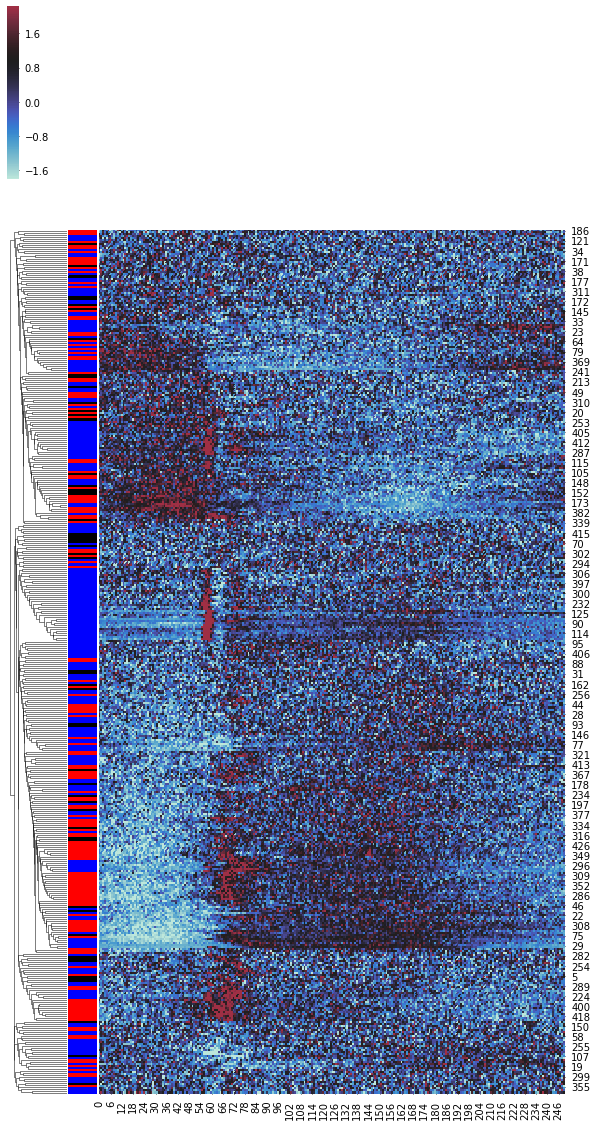

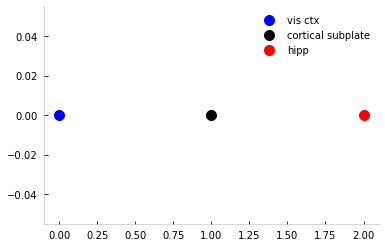

In [4]:
# HIDE CODE
_, all_psth = deps.get_psth(spikes=spykes_times,
                       spykes_df=events_df,
                       event='trial_start', 
                       conditions=[],
                       window=[0, 2500],  
                       bin_size=10,
                       )
all_psth['conditions']=''
# Make psth
xar=deps.spyke2xar(all_psth,
                   spykes_times['brain_group'].values,  
                   spykes_times['brain_group_color'].values)

# Cluster
df,df_tidy,index=deps.cluster(xar,plotose=False,thr_n_spikes=0) 

## Loop over events and conditions

In [ ]:
# HIDE CODE
# Make list of events
events=['trial_start']
events.extend(events_df.columns[events_df.columns.str.contains('time')])


for event_name in events:
    for condition_name in events_df.columns[~events_df.columns.str.contains('time')]:
        
        # Some checks
        if event_name=='trial_start':
            window=[0,2500] # Entire trial
        else:
            window=[-500, 500] # 1 sec
        if condition_name=='trial_start':
            continue # not a condition
        
        # Make psth
        _, all_psth = deps.get_psth(spikes=spykes_times,
                               spykes_df=events_df,
                               event=event_name, 
                               conditions=condition_name,
                               window=window,  
                               bin_size=5,
                               )
        # Convert psth
        xar=deps.spyke2xar(all_psth,
                           spykes_times['brain_group'].values,  
                           spykes_times['brain_group_color'].values)

        # Cluster
        df,df_tidy,index=deps.cluster(xar,plotose=True,thr_n_spikes=20)